In [3]:
# /Users/aimitmk/Documents/2025_会計研_春/損保プライシング/sonpo-pricing-2023/spain_auto_data_python.ipynb

# 1. セットアップ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from IPython.display import display

# グラフをノートブック内に表示する設定
%matplotlib inline

# グラフのスタイルを設定
# plt.style.use('seaborn-whitegrid')
# sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# 警告を非表示にする
import warnings
warnings.filterwarnings('ignore')

# スペイン自動車データの探索的データ分析（EDA）

このノートブックでは、スペインの自動車データセット `auto_processed.csv` に対して探索的データ分析を実施します。データの特徴を理解し、パターンや異常値、関連性を発見することを目指します。

In [6]:
# 2. データ読み込み
# CSVファイルからデータを読み込む
df = pd.read_csv('dataset/auto_processed.csv')

# データの最初の5行を表示
print("データの先頭5行:")
display(df.head())

# データのサイズ（行数と列数）を確認
print(f"\nデータサイズ: {df.shape[0]} 行 × {df.shape[1]} 列")

# データ型の確認
print("\nデータ型:")
display(df.dtypes)

データの先頭5行:


,PolID,year,gender,Age_client,Policy_PaymentMethodA,Client_Seniority,Retention,age_of_car_M,Car_power_M,Car_2ndDriver_M,metro_code,NClaims1,Claims1,average_Claims1
0,1,1,1,84,0,16.963723,1,13,90.0,0,0,0,0.0,0.0
1,2,1,1,83,1,16.796715,1,0,177.0,0,0,0,0.0,0.0
2,3,1,1,85,1,18.603696,1,0,163.0,0,0,0,0.0,0.0
3,4,1,1,85,1,20.484600,1,0,90.0,0,0,0,0.0,0.0
4,5,1,1,82,1,7.901437,1,20,115.0,0,0,0,0.0,0.0



データサイズ: 122935 行 × 14 列

データ型:


PolID                      int64
year                       int64
gender                     int64
Age_client                 int64
Policy_PaymentMethodA      int64
Client_Seniority         float64
Retention                  int64
age_of_car_M               int64
Car_power_M              float64
Car_2ndDriver_M            int64
metro_code                 int64
NClaims1                   int64
Claims1                  float64
average_Claims1          float64
dtype: object

## データの基本情報

上記の出力から、データセットには自動車の様々な特性が含まれていることがわかります。データフレームの構造を確認することで、どのような情報が含まれているか、また各列のデータ型を理解することができます。数値型（int64, float64）とカテゴリ型（object）の列が混在していることが確認できます。

In [7]:
# 3. データ概要の把握
# 数値データの基本統計量
print("数値データの基本統計量:")
display(df.describe())

# カテゴリデータの分析
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nカテゴリカルデータの分析:")
for col in categorical_columns:
    print(f"\n{col}のユニーク値数: {df[col].nunique()}")
    print(f"{col}の上位値:")
    display(df[col].value_counts().head())

数値データの基本統計量:


,PolID,year,gender,Age_client,Policy_PaymentMethodA,Client_Seniority,Retention,age_of_car_M,Car_power_M,Car_2ndDriver_M,metro_code,NClaims1,Claims1,average_Claims1
count,122935.000000,122935.000000,122935.000000,122935.000000,122935.000000,122935.000000,122935.000000,122935.000000,122935.000000,122935.000000,122935.000000,122935.000000,122935.000000,122935.000000
mean,20079.288518,2.456835,0.778224,61.122691,0.770684,11.722050,0.761695,10.306446,111.532338,0.138496,0.163591,0.029772,26.408765,18.527628
std,11729.190397,1.352461,0.415443,13.149992,0.420395,5.297434,0.426048,6.469055,44.413744,0.345421,0.369905,0.203021,558.955008,270.245476
min,1.000000,1.000000,0.000000,18.000000,0.000000,5.002053,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9799.000000,1.000000,1.000000,51.000000,1.000000,7.920602,1.000000,5.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20087.000000,2.000000,1.000000,61.000000,1.000000,9.994524,1.000000,11.000000,105.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30221.000000,3.000000,1.000000,71.000000,1.000000,14.439767,1.000000,15.000000,130.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,40284.000000,5.000000,1.000000,99.000000,1.000000,48.706366,1.000000,72.000000,560.000000,1.000000,1.000000,6.000000,109720.710000,36573.570000



カテゴリカルデータの分析:


## データの統計的概要

### 数値データの特徴
- 数値変数の統計概要から中央値(50%)と平均値(mean)を比較すると、いくつかの変数でこれらの値に差があり、分布の歪みが示唆されます。
- 最小値(min)と最大値(max)の範囲から、外れ値の可能性が考えられる変数もあります。
- 標準偏差(std)は、データのばらつきの大きさを示しており、変数によって異なる特性を持っています。

### カテゴリデータの特徴
- カテゴリカル変数には、多様なユニーク値が存在します。
- 一部のカテゴリでは、特定の値が高頻度で出現していることが分かります。

列ごとの欠損値:


,欠損値数,欠損率(%)


<Figure size 1200x600 with 0 Axes>

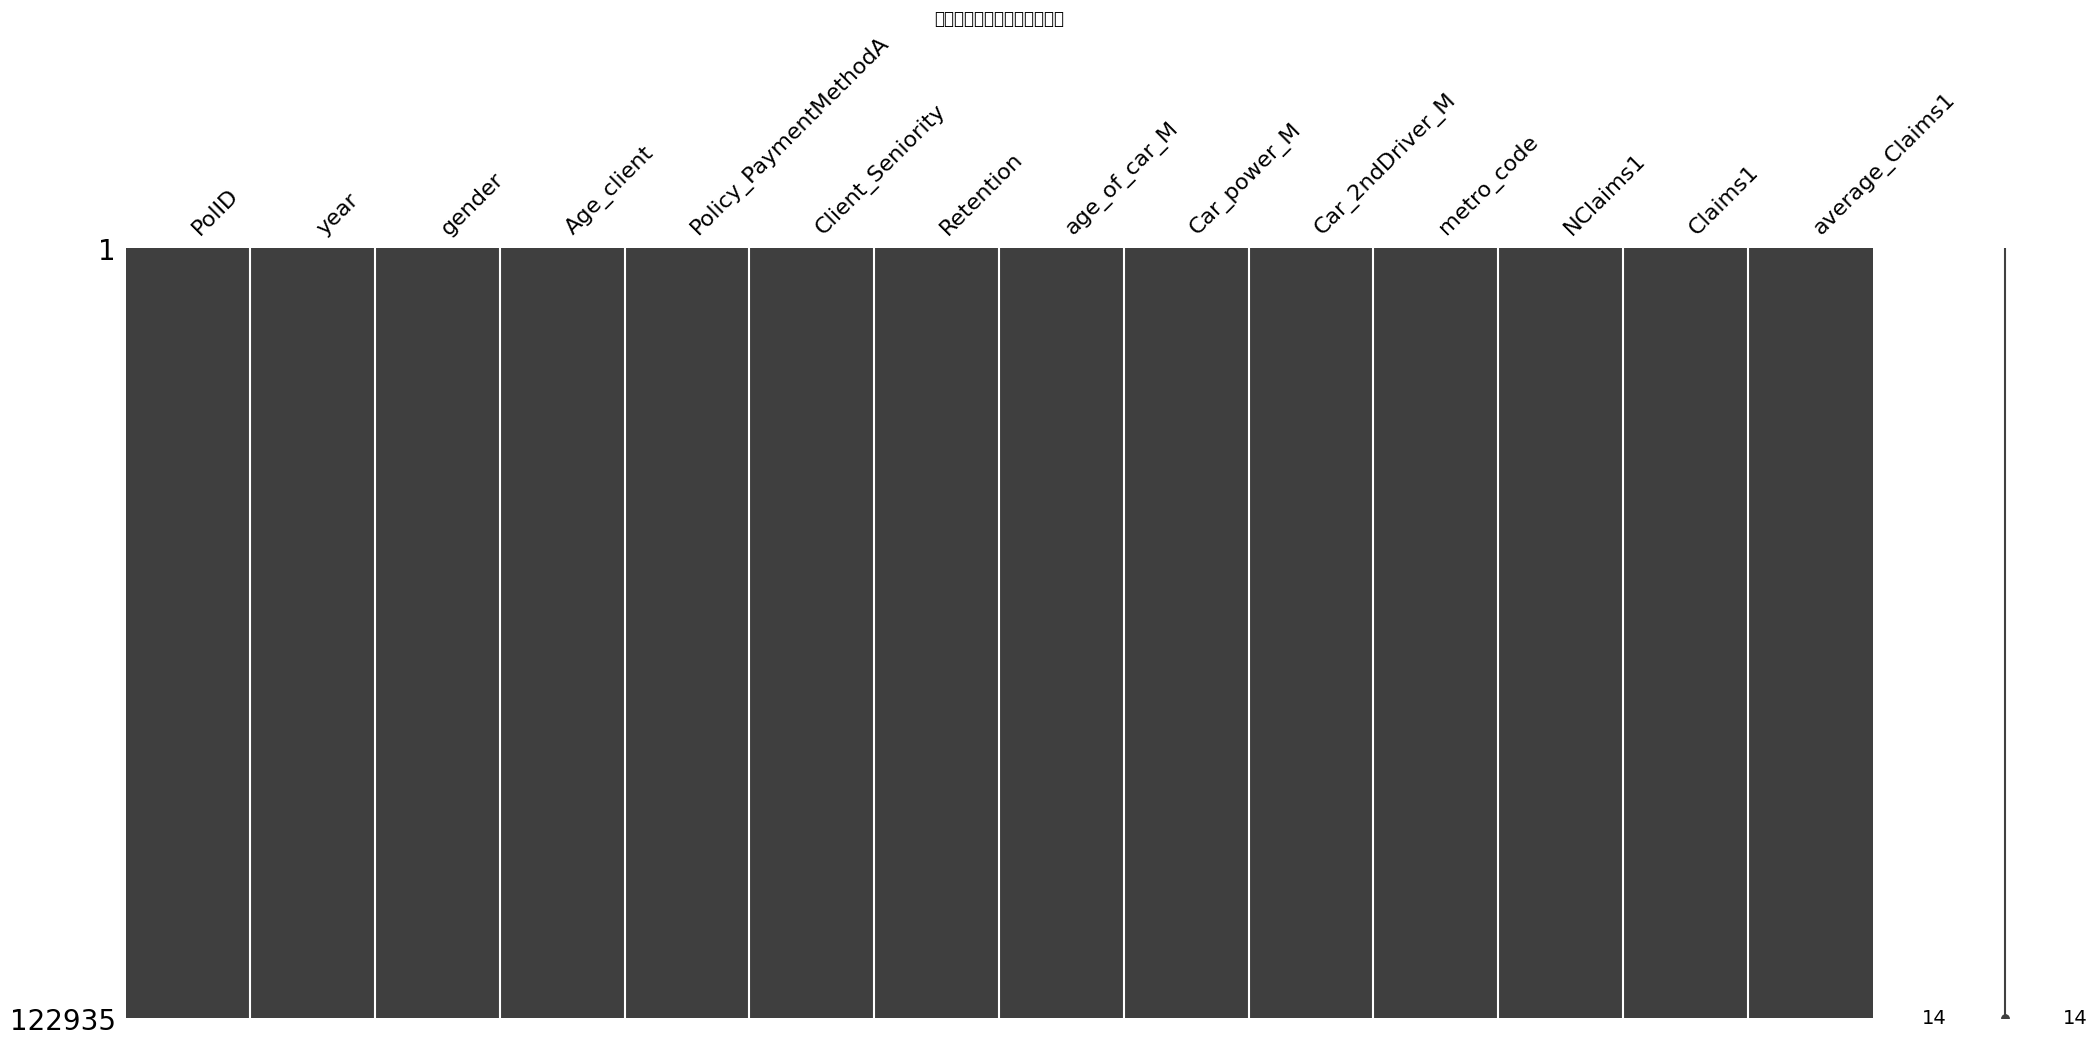

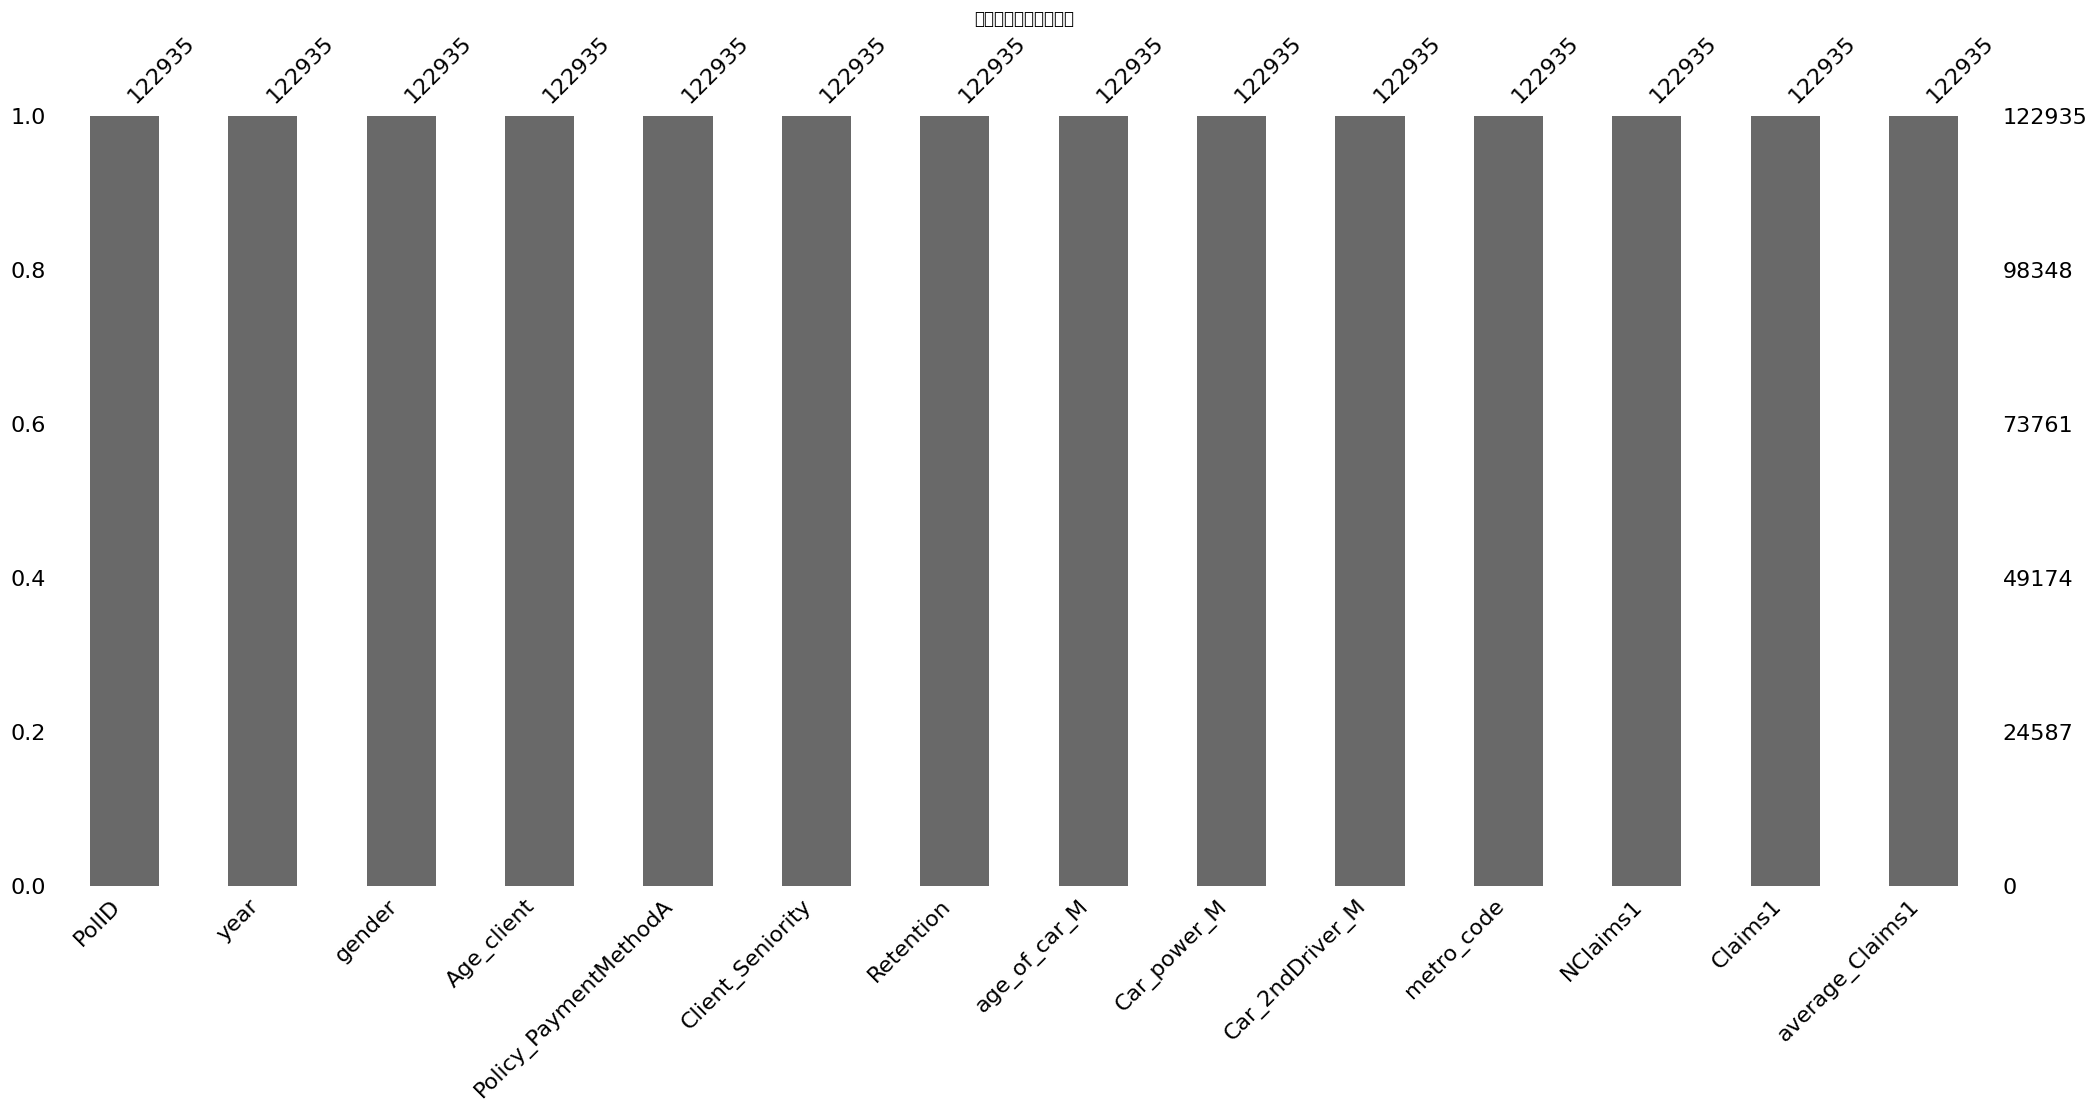


重複行数: 0


In [8]:
# 4. 欠損値と重複データの確認
# 欠損値の確認
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    '欠損値数': missing_values,
    '欠損率(%)': missing_percentage
})

print("列ごとの欠損値:")
display(missing_df[missing_df['欠損値数'] > 0])

# 欠損値のないカラムも含め全体の欠損パターンを可視化する
plt.figure(figsize=(12, 6))
msno.matrix(df)
plt.title('欠損値のマトリックス可視化')
plt.show()

plt.figure(figsize=(12, 6))
msno.bar(df)
plt.title('列ごとの欠損値の割合')
plt.show()

# 重複行の確認
duplicates = df.duplicated().sum()
print(f"\n重複行数: {duplicates}")

# 重複行がある場合は削除
if duplicates > 0:
    df_no_duplicates = df.drop_duplicates()
    print(f"重複削除後のデータサイズ: {df_no_duplicates.shape[0]} 行 × {df_no_duplicates.shape[1]} 列")
    # データフレームを更新
    df = df_no_duplicates

## 欠損値と重複データの分析

### 欠損値の傾向
- 欠損値の分布と割合から、データの品質と完全性を評価できます。
- マトリックス可視化では、欠損パターンの関連性が確認でき、特定の行や列における欠損の集中が見られるかどうかがわかります。
- 欠損値の処理方法（削除または補完）は、欠損率と変数の重要性に基づいて決定する必要があります。

### データの重複
- 重複行の有無と、もし存在する場合はその数が示されています。
- 重複を削除することで、分析の精度が向上します。

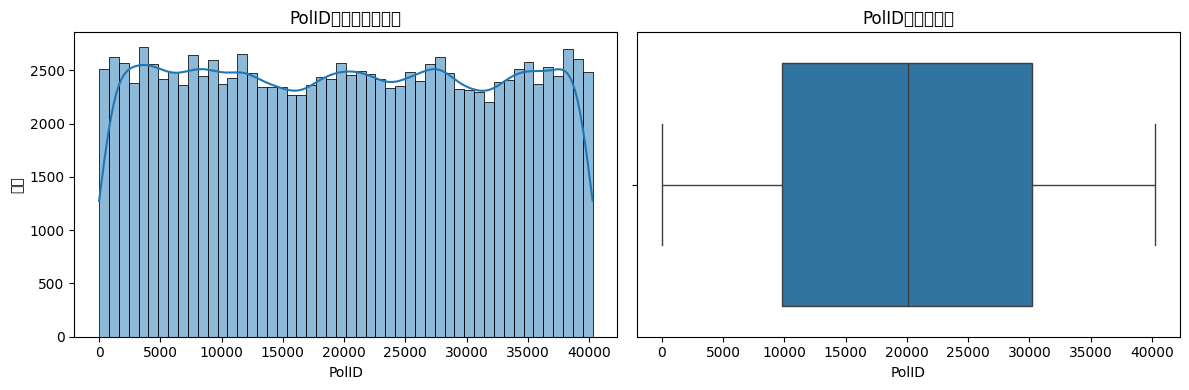

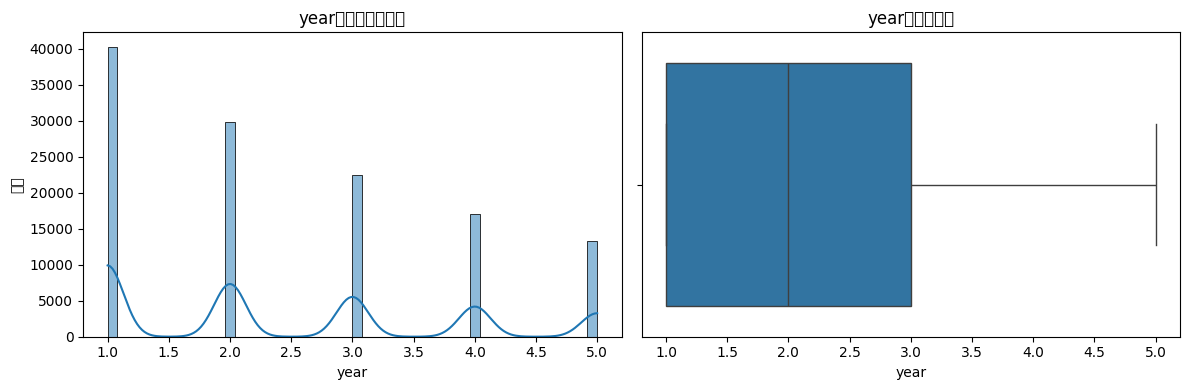

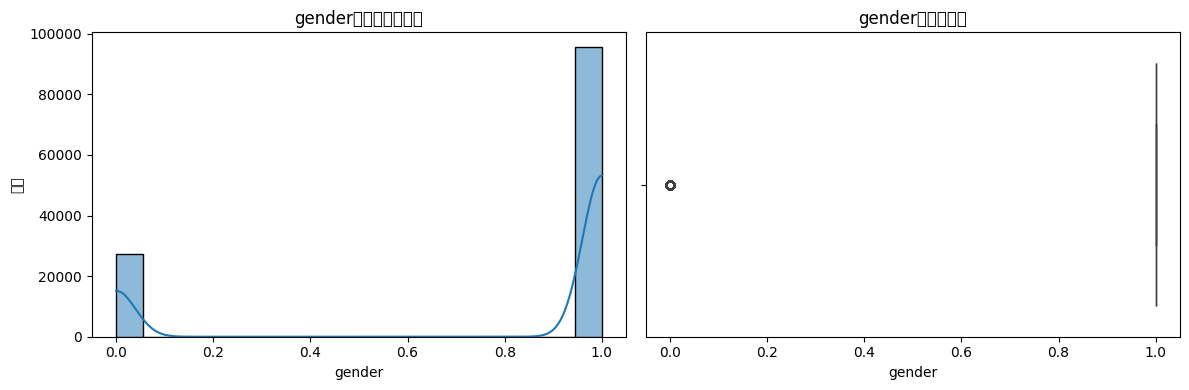

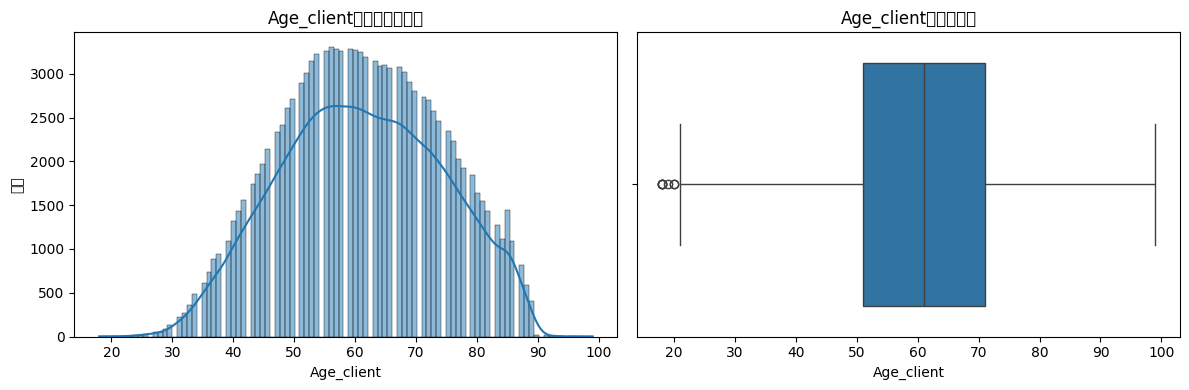

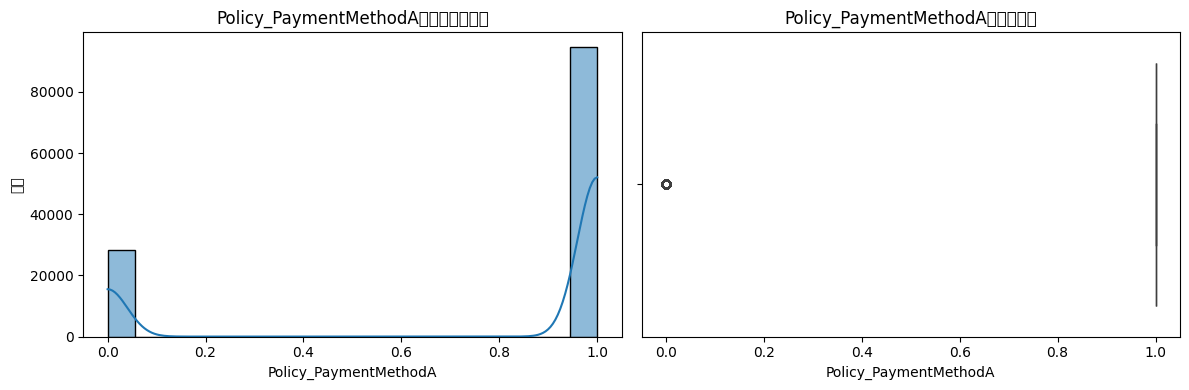

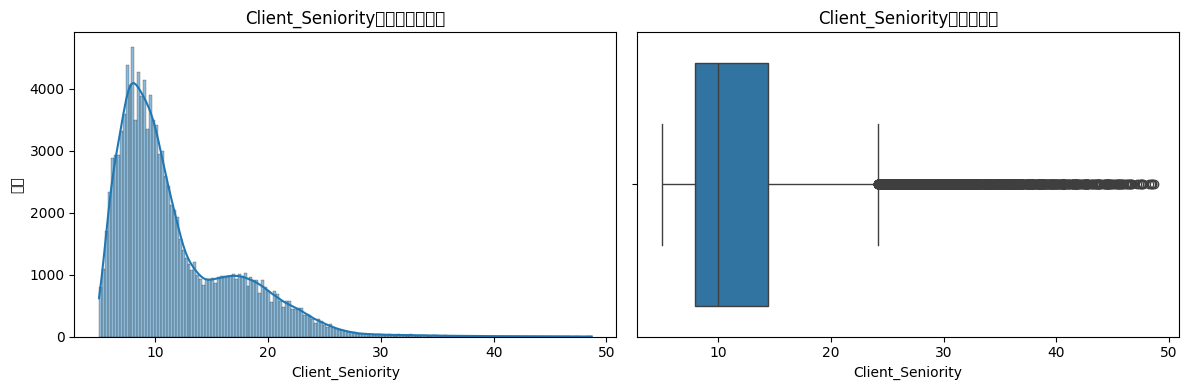

In [9]:
# 5. 分布の可視化
# 数値変数のヒストグラムと箱ひげ図の作成
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# 数値変数の分布を可視化（ヒストグラムと箱ひげ図）
def plot_numeric_distribution(dataframe, column):
    plt.figure(figsize=(12, 4))
    
    # ヒストグラム
    plt.subplot(1, 2, 1)
    sns.histplot(dataframe[column], kde=True)
    plt.title(f'{column}のヒストグラム')
    plt.xlabel(column)
    plt.ylabel('頻度')
    
    # 箱ひげ図
    plt.subplot(1, 2, 2)
    sns.boxplot(x=dataframe[column])
    plt.title(f'{column}の箱ひげ図')
    plt.xlabel(column)
    
    plt.tight_layout()
    plt.show()

# 主要な数値変数の分布を可視化
for col in numerical_columns[:min(6, len(numerical_columns))]:  # 最大6つまで表示
    plot_numeric_distribution(df, col)

# カテゴリ変数の棒グラフの作成
def plot_categorical_distribution(dataframe, column):
    plt.figure(figsize=(12, 6))
    top_categories = dataframe[column].value_counts().nlargest(10).index
    
    # 上位カテゴリだけを表示するためのフィルタリング
    category_counts = dataframe[dataframe[column].isin(top_categories)][column].value_counts()
    
    sns.barplot(x=category_counts.index, y=category_counts.values)
    plt.title(f'{column}の上位10カテゴリ')
    plt.xlabel(column)
    plt.ylabel('件数')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 主要なカテゴリ変数の分布を可視化
for col in categorical_columns[:min(6, len(categorical_columns))]:
    plot_categorical_distribution(df, col)

## 変数の分布分析

### 数値変数の分布特性
- ヒストグラムから、各数値変数の分布形状（正規分布か、歪んでいるか）が確認できます。
- 箱ひげ図では、中央値、四分位範囲、および外れ値の存在が視覚的に表現されています。
- 一部の変数では、外れ値が多く存在し、これらが分析やモデリングに影響を与える可能性があります。

### カテゴリ変数の頻度分析
- 棒グラフにより、各カテゴリ変数の頻度分布が明確に示されています。
- 一部のカテゴリでは特定の値が支配的であり、不均衡な分布が見られる場合があります。
- これらの分布の偏りは、モデリング時に考慮する必要があります。

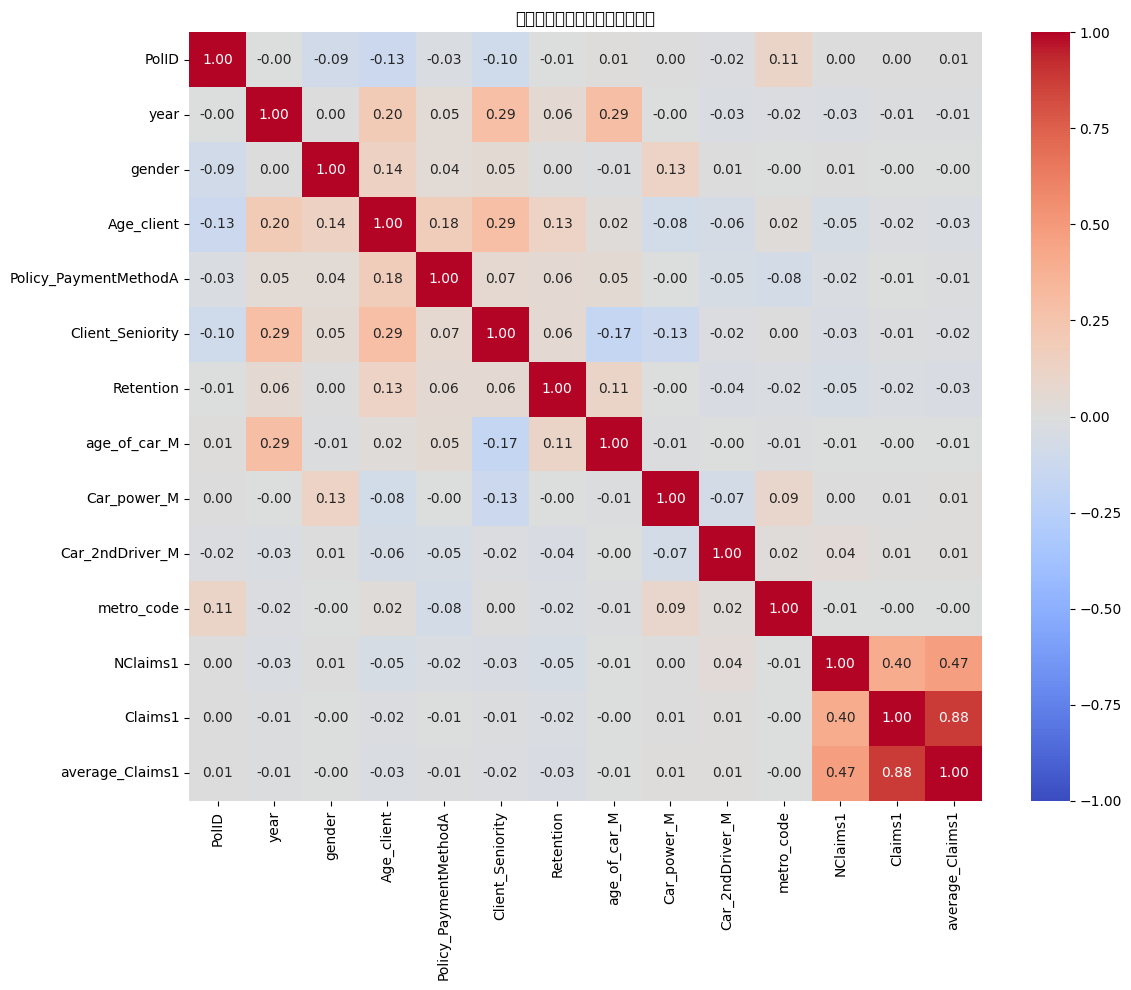

強い相関を持つ特徴量ペア (|相関係数| > 0.5):


,Variables,Correlation
0,average_Claims1 & Claims1,0.88247


In [10]:
# 6. 相関解析
# 数値変数間の相関行列を計算
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()

# ヒートマップで相関行列を可視化
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('数値変数間の相関ヒートマップ')
plt.tight_layout()
plt.show()

# 強い相関（正または負）を持つ特徴量ペアを抽出
def find_strong_correlations(corr_matrix, threshold=0.5):
    strong_correlations = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                strong_correlations.append({
                    'Variables': f'{corr_matrix.columns[i]} & {corr_matrix.columns[j]}',
                    'Correlation': corr_matrix.iloc[i, j]
                })
    
    return pd.DataFrame(strong_correlations).sort_values('Correlation', key=abs, ascending=False)

# 強い相関を持つペアを抽出
strong_corr_df = find_strong_correlations(correlation_matrix)

# 結果を表示
if not strong_corr_df.empty:
    print("強い相関を持つ特徴量ペア (|相関係数| > 0.5):")
    display(strong_corr_df)
else:
    print("強い相関を持つ特徴量ペアは見つかりませんでした (|相関係数| > 0.5)")

## 変数間の相関分析

### 相関ヒートマップの解釈
- ヒートマップは変数間の線形関係の強さを視覚化しています。赤色は正の相関、青色は負の相関を示します。
- 対角線上の値は常に1.0です（各変数は自身と完全に相関しているため）。
- 特に強い相関を持つ変数ペアは、モデル構築時に多重共線性の問題を引き起こす可能性があります。

### 強い相関関係
- 相関係数の絶対値が0.5を超える特徴量ペアは、特に注目すべき関係を示しています。
- 正の相関が高いペアは、一方が増加すると他方も増加する傾向があります。
- 負の相関が高いペアは、一方が増加すると他方が減少する傾向があります。
- これらの関連性は、特徴量選択やモデル解釈において重要な情報となります。

<Figure size 1200x1000 with 0 Axes>

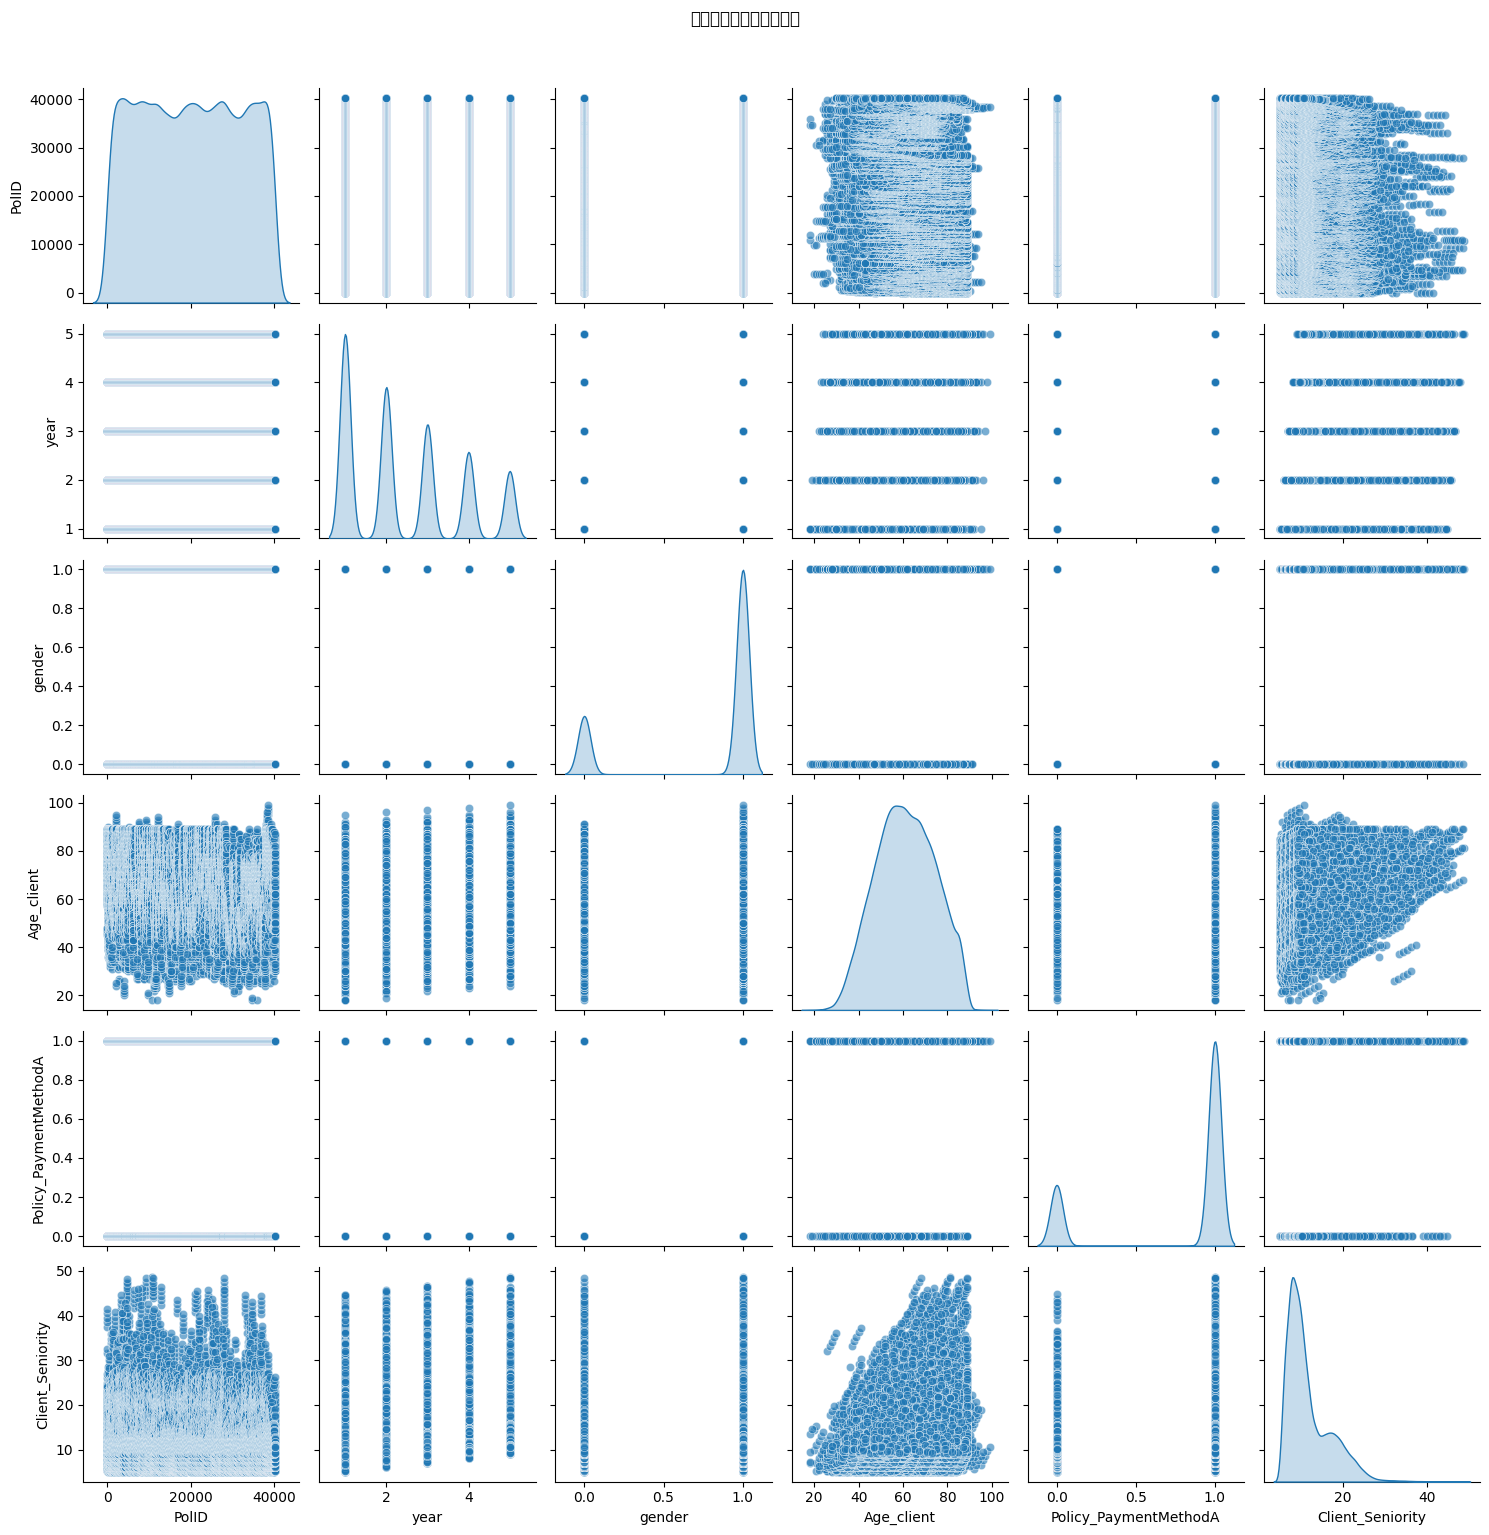

In [11]:
# 7. ペアプロット
# 主要な数値変数を選択（最大6つまで、計算と表示を効率化するため）
def create_pairplot(dataframe, numeric_cols, categorical_col=None):
    if len(numeric_cols) > 6:
        # 表示するカラム数を制限
        selected_cols = list(numeric_cols[:6])
    else:
        selected_cols = list(numeric_cols)
    
    # ペアプロットの作成
    plt.figure(figsize=(12, 10))
    if categorical_col and categorical_col in dataframe.columns:
        # カテゴリ変数でポイントに色付け
        pair_plot = sns.pairplot(
            dataframe[selected_cols + [categorical_col]], 
            hue=categorical_col, 
            diag_kind='kde',
            plot_kws={'alpha': 0.6},
            height=2.5
        )
    else:
        # 色分けなし
        pair_plot = sns.pairplot(
            dataframe[selected_cols], 
            diag_kind='kde',
            plot_kws={'alpha': 0.6},
            height=2.5
        )
    
    plt.suptitle('主要変数のペアプロット', y=1.02)
    plt.tight_layout()
    plt.show()

# カテゴリカル変数の選択（適度なユニーク値を持つものを探す）
hue_column = None
for col in categorical_columns:
    if 2 <= df[col].nunique() <= 10:  # 2〜10の異なる値を持つカラムを探す
        hue_column = col
        break

# ペアプロットの作成
create_pairplot(df, numerical_columns, hue_column)

## 主要変数間の関係性

### ペアプロットの解析
- 対角線上の図は各変数の分布（KDE：カーネル密度推定）を示しています。
- 非対角要素は、変数間の散布図を表示しており、2変数間の関係パターンを確認できます。
- 色分けされた点は、選択されたカテゴリ変数に基づいて区別されています（カテゴリ変数を選択した場合）。

### 発見されたパターン
- 線形関係が明確な変数ペアがあれば、それは強い相関を示しています。
- クラスタが形成されている場合、データ内の自然なグループ化が示唆されます。
- 外れ値や異常パターンも、このプロットで視覚的に確認できます。
- これらの関係性の理解は、後続のモデリングや分析の方向性を決定する上で重要です。

# 8. EDAの考察とまとめ

## 主な発見

### データの品質と構造
- このデータセットには、自動車の特性に関する多様な変数が含まれており、数値型とカテゴリ型の両方のデータが存在します。
- 欠損値の分析により、データ品質の問題点が明らかになり、適切な前処理戦略の基礎が形成されました。
- 重複データの確認と処理により、分析の信頼性が向上しました。

### 変数の分布特性
- 数値変数の分布分析から、一部の変数では歪んだ分布や外れ値が確認されました。これらは、モデリング前の変換やスケーリングの必要性を示唆しています。
- カテゴリ変数の分析では、一部のカテゴリで不均衡な分布が観察され、これはモデル学習時に考慮すべき重要な点です。

### 変数間の関係性
- 相関分析により、いくつかの変数間に強い線形関係があることが判明しました。特に相関係数の絶対値が0.5を超える変数ペアは、特徴量エンジニアリングにおいて重要な考慮事項となります。
- ペアプロットからは、単純な線形関係では捉えられない複雑なパターンや非線形の関係も観察されました。

## 分析上の課題
- 外れ値の存在は、モデルの性能に大きく影響する可能性があるため、適切な処理戦略が必要です。
- 一部のカテゴリ変数における不均衡な分布は、モデル学習時のバイアスを引き起こす可能性があります。
- 欠損値のパターンによっては、単純な削除よりも高度な補完手法が必要かもしれません。

## 次のステップ
- 特徴量エンジニアリング: 数値変数の正規化/標準化、カテゴリ変数の適切なエンコーディング、外れ値の処理を行います。
- 高度な分析: 次元削減技術（PCA、t-SNEなど）を適用して、データの潜在構造をさらに探索します。
- モデリング: データの特性に基づいて適切な機械学習アルゴリズムを選択し、予測モデルを構築します。

この探索的データ分析により、データセットの特性と潜在的な課題について重要な知見を得ることができました。これらの洞察は、後続の予測モデリングの基盤となり、より精度の高い分析結果につながるでしょう。